In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\abhin\OneDrive\Documents\code\ML\Udemy\data\economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.drop(columns=["Unnamed: 0","year","month"],inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


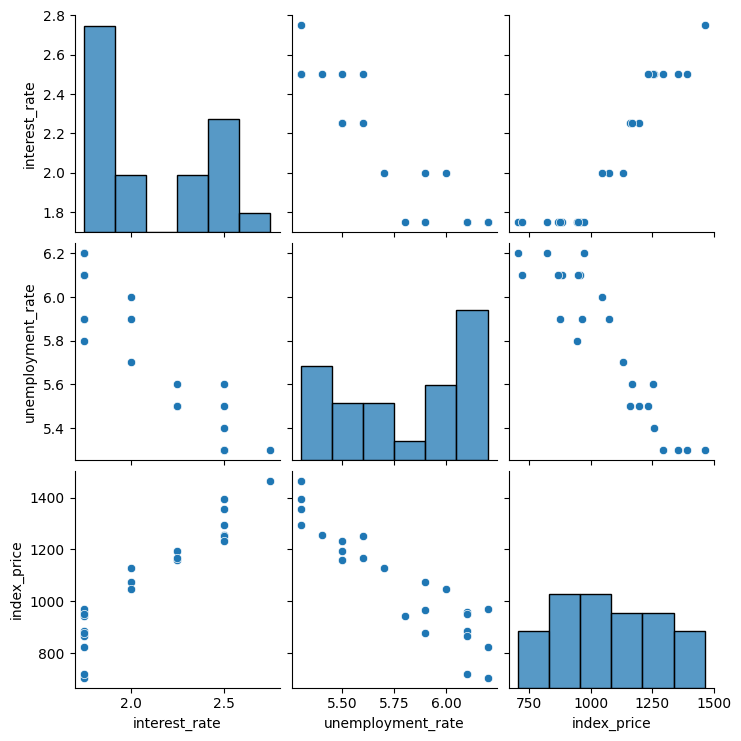

In [10]:
sns.pairplot(df)

In [22]:
X = df[['interest_rate','unemployment_rate']] #should be 2 dimension for regression 
y = df['index_price']

#or
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [23]:
np.array(X).shape #2d

(24, 2)

In [13]:
np.array(y).shape #1d

(24,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train = df[[""]] 

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

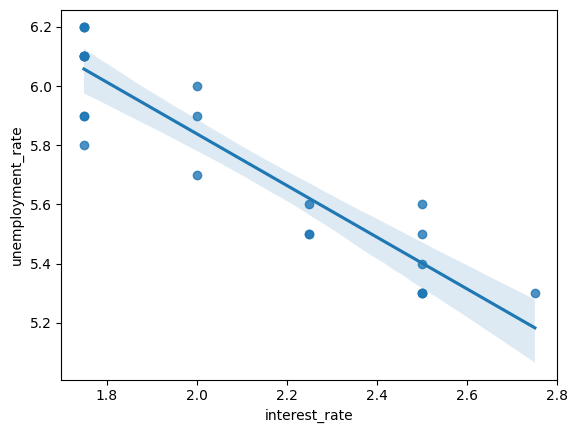

In [26]:
#important as it plots regression model fits
#only one feature possible but
sns.regplot(x = df['interest_rate'], y = df['unemployment_rate'])

In [16]:
X_train.shape

(18, 2)

In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
#we fit the model with the training data
regression = LinearRegression().fit(X_train,y_train)
print(regression.coef_)
print(regression.intercept_) #beta 1

[ 260.33709119 -360.58377051]
2601.67998660565


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)#causes leakage as z score is being learnt from
# the test data which we dont want.
#so instead we use these where we perform direct transform using z score of train data only.
X_test_scaled = scaler.transform(X_test)
#the model shouldnt know anythingf about the test data

ValueError: x and y must be the same size

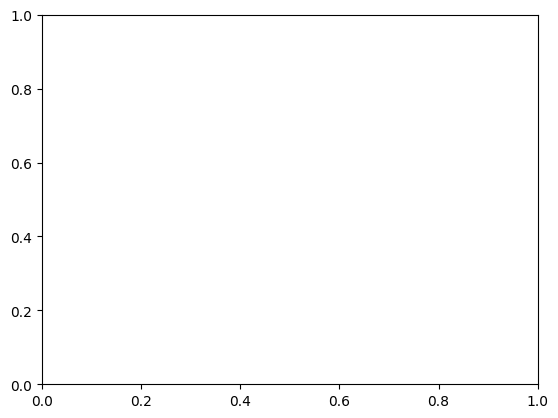

In [ ]:
#predict with xtrain
# CANNOT PLOT 3D...... 
# plt.scatter(X_train, y_train, label='Actual')
# plt.plot(X_train, regression.predict(X_train), color='red', label='Predicted')
# plt.xlabel("Weight")
# plt.ylabel("Height")
# plt.legend()
# plt.show()

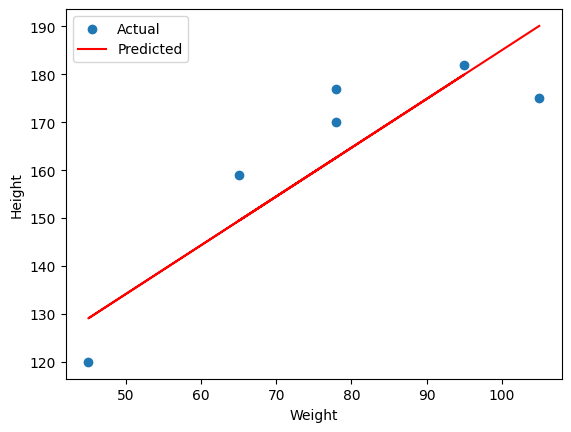

In [ ]:
# then see with test data
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, regression.predict(X_test), color='red', label='Predicted')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()

In [40]:
regression.predict(X = [[50],[70]])

c:\Users\abhin\OneDrive\Documents\code\ML\Udemy\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([134.17103472, 154.50191798])

In [ ]:
###Skipped Standardization.(as it is not needed)

In [ ]:
####Performance metrics and cost functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score  
y_pred = regression.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2_score(y_test, y_pred)) #74% accurate




111.1329779301663
9.594335964890575
10.541962717168293
0.7446034340577091


In [65]:
!pip install statsmodels

   ---------------------------------------- 9.8/9.8 MB 3.4 MB/s eta 0:00:00



In [66]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.15e-09
Time:                        17:49:31   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5268      5.897     13.656      0.0

c:\Users\abhin\OneDrive\Documents\code\ML\Udemy\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [1]:
import pickle

pickle.dump(regression,open('regression_model.pkl','wb'))

NameError: name 'regression' is not defined

In [ ]:
model = pickle.load(open('regression_model.pkl','rb'))

In [ ]:
model.predict(X_test_scaled)